In [ ]:
from google.colab import files
uploaded = files.upload()


Saving cleaned_reviews.csv to cleaned_reviews (1).csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('cleaned_reviews.csv')
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          5000 non-null   object
 1   cleaned_review  5000 non-null   object
 2   sentiment       5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB


,0
review,0
cleaned_review,0
sentiment,0


In [ ]:
df.head()
X = df.drop('sentiment',axis = 1)
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    train_size=0.7,
    random_state=42,

)
print(y_train.value_counts())
class_probs = y_train.value_counts(normalize=True).to_dict()
class_probs

sentiment
positive    1751
negative    1749
Name: count, dtype: int64


{'positive': 0.5002857142857143, 'negative': 0.4997142857142857}

#Prob of word

In [ ]:
#Training phase in NB
# Calculate probabilities for each class separately

vocab = set()
vocab_pos = {}
vocab_neg = {}
for i in range(len(X_train)):
    review = X_train.iloc[i]['cleaned_review']

    for word in review.split():
        if y_train.iloc[i]==  'positive':
          vocab_pos[word] = vocab_pos.get(word,0) + 1
        else :
            vocab_neg[word] = vocab_neg.get(word, 0 ) + 1
        vocab.add(word)

print("Positive vocab size:", len(vocab_pos))
print("Negative vocab size:", len(vocab_neg))
print("Total vocab size:", len(vocab))


Positive vocab size: 23629
Negative vocab size: 22650
Total vocab size: 32721


#Testing

In [ ]:
pred_values = []
n_pos =  sum(vocab_pos.values())
n_neg  = sum(vocab_neg.values())
vocab_size = len(vocab)
for row in  X_test['cleaned_review'] :
  pos_prob = class_probs['positive']
  neg_prob = class_probs['negative']
  for word in row.split():
    pos_prob *= (vocab_pos.get(word, 0)  + 1)/(n_pos + vocab_size)
    neg_prob *= (vocab_neg.get(word, 0)  + 1)/(n_neg + vocab_size)
  predicted_class = 'positive' if pos_prob > neg_prob else 'negative'
  pred_values.append(predicted_class)




##Evaluation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


accuracy = accuracy_score(y_test, pred_values)
precision = precision_score(y_test, pred_values, pos_label='positive')  # edible as positive
recall = recall_score(y_test, pred_values, pos_label='positive')
f1 = f1_score(y_test, pred_values, pos_label='positive')
print("Accuracy", accuracy, " Precision ", precision , " Recall ", recall, " F1 Score ", f1)

Accuracy 0.564  Precision  0.8620689655172413  Recall  0.10460251046025104  F1 Score  0.1865671641791045


In [ ]:
import math

pred_values = []
n_pos = sum(vocab_pos.values())
n_neg = sum(vocab_neg.values())
vocab_size = len(vocab)

for row in X_test['cleaned_review']:
    # Start with log of class probabilities
    pos_prob = math.log(class_probs['positive'])
    neg_prob = math.log(class_probs['negative'])

    for word in row.split():
        # Add log probabilities instead of multiplying
        pos_prob += math.log((vocab_pos.get(word, 0) + 1) / (n_pos + vocab_size))
        neg_prob += math.log((vocab_neg.get(word, 0) + 1) / (n_neg + vocab_size))

    predicted_class = 'positive' if pos_prob > neg_prob else 'negative'
    pred_values.append(predicted_class)

accuracy = accuracy_score(y_test, pred_values)
precision = precision_score(y_test, pred_values, pos_label='positive')  # edible as positive
recall = recall_score(y_test, pred_values, pos_label='positive')
f1 = f1_score(y_test, pred_values, pos_label='positive')
print("Accuracy", accuracy, " Precision ", precision , " Recall ", recall, " F1 Score ", f1)


Accuracy 0.82  Precision  0.8371040723981901  Recall  0.7740585774058577  F1 Score  0.8043478260869565


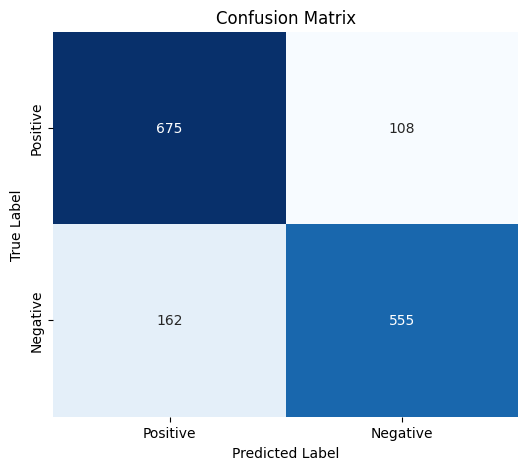

In [ ]:
cm = confusion_matrix(y_test, pred_values)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()